# Math 182 Algorithms Final Project
### Group H: Lathem Wojno, Ashley Chang, and Cavan Stewart 

# Gale-Shapley Algorithm and its Applications/Variations
### Proposed Application: Uber Driver + Rider Stable Matching 


### Contents
1. Project Description
2. Algorithm Design / Discussion
3. Algorithm Code
    * a. Gale-Shapely Stable Marriage Implementation
    * b. Weighted Graph Implementation 
    * c. Dijkstra Preference Lists Implementation 
    * d. Gale-Shapely Stable Uber Driver-Rider Implementation
4. Algorithm Analysis
5. Test Results 
6. Summary

## 1. Project Description 

### Background 

The original algorithm proposed to solve the "Stable-Matching" problem was devised by David Gale and Lloyd Shapley in 1962. In their original paper titled "College Admissions and the Stability of Marriage", Gale and Shapley looked towards two of the most basic possible matching scenarios, in which they hoped to discover a systematic approach that would always find the optimal matching solution. The optimal solution, or a "stable" match, would consist of ensuring every element was a member of at least one pair, and no two unpaired elements would both prefer to be paired with one another instead of their partners. Gale and Shapley's first application of their algorithm was even simpler, because they were looking at two equal sized groups of people and only allowed every person to be apart of one single match, or in this case, marriage. Similarly, the most basic implementation of their algorithm on the college admissions process assumed that every college would match with just one prospective student in equal numbers. However, they also discussed how the algorithm could be adapted to match multiple students to each college, which would be the first of many such adaptions of their algorithm that can be used to find optimal solutions to more complex problems. 

### Gale-Shapley Stable Marriage Algorithm

Before trying to adapt the Gale-Shaply algorithm to a new application, we will first implement it in its basic form following the stable-marriage problem. This will provide us with the framework needed before proceeding to our more complex problem. The first requirement to the stable marriage problem is to maintain lists of preference for both the men and the women to be matched. The algorithm proceeds by iterating through all of the women (or men) until every woman (or man) has been matched. 

In the case of iterating through the women, we will maintain a list free women (i.e. women who have not yet been engaged). In each iteration, we will select the next woman on the list and iterate over her preferences until a man accepts her proposal and she becomes engaged. If the next most prefered man on the current woman's list is 'free', then they become engaged. If the next most prefered man is already engaged, he will choose to either accept the offer and engage this women, or reject the offer and remain engaged to his current fiance. He will do this based on his own maintained preference list. If an engaged man rejects the proposal, we will continue down the woman's preference list until she has been matched. If an engaged man accepts her proposal and disengages his current fiance, his disengaged fiance is added back to the list of free women - indictating that she still has yet to be matched, at which time her preference list will later be reiterated over again. 

This implementation has a both a time and space complexity of $O(n^2)$, where n is the number of woman (or men). This is because we are assuming equal number of women and men, and maintaining a preference list for each of them of size n, corressponding to the opposite gender. The time complexity upper bound arises as there could be at most n iterations over lists of length n times some constant. 

### Proposed Application of Stable Matching Algorithm: Uber Drivers + Riders 

The main piece of our project will be attempting to simulate and find the optimal solution to matching Uber drivers with Uber app users requesting rides. In order to accomplish this, we will be adapting the implementation of the stable marriage problem in the simplest case, where there are n drivers and n passengers and only one factor determining preference for each group. A randomized weighted graph will be used to model this scenario, and our focus will be to optimize this scenario for n passengers each requesting a single ride from n available drivers. The factor we will use to determine the preference lists for each group will be distance. Our main goal will be to find an optimal solution to this problem over each time step when there are drivers available, or in other words determining who the available drivers should pick up next depending on their preferences. However, we will also be striving to implement this with the lowest possible time and space complexity, and consider both the time and space needed to determine the preferences and to compute the stable matches. 

#### Weighted Graph Model 
Our weighted graph model will act as a network of locations and roads linking these locations. Each node will be a location where either a passenger or driver can be located at when requesting a ride or waiting to be assigned to a job, respectively. Each weighted edge will be a rode with the weight indicating the distance between the two connected locations. We will maintain the weighted graph as an adjacency list, which will lower our overall time complexity in comparision to using an adjacency matrix representation. This is due to the fact that passenger and driver preference will be dependent on shortest and longest paths throughout the weighted graph model depending on their current location and the passengers indicated destination. 

#### Uber Matching Implementation 
For our implementation, we will first produce a randomized weighted graph and place an equal number of drivers and passengers at nodes throughout the graph. The passengers' requested destinations will also be randomized and their preference lists will be computed using an adaptation of BFS, Dijkstra Algorithm, to find which drivers are nearest too them to minimize their wait time. In the basic implementation, the drivers' preference lists will the computed in a similar fashion, so to minimize the time they are driving around or waiting without getting paid. We will not be taking into account the distance of the trips requested in this implementation. Therefore, the stable marriage algorithm should be easy to adapt to this situation once the preference lists are built, and each passenger is linked to a driver. We will keep track of the distance (time) each driver travels to pick up the passengers in order to check if this is indeed the optimal solution against randomized pairings of drivers and passengers. We could also run into the problem of equal preference, or stable marriage with indifference, where a passenger is the same distance away from two drivers and would like to ride with either one, or two passengers are located at the same location and requesting a ride. To decrease out time and space complexity, if this arises, we will treat the two passengers or drivers as equal so we only have to run Dijkstra for one of them to determine the preference lists. Furthermore, we will have to consider matches that are weakly-stable, super-stable, or strongly-stable. Our overall goal will be to keep the time complexity of our complete algorithm in polynomial time for each time step (multiplied by a constant number of time steps for which the algorithm is run). We believe this is possible as the BFS applications involved will all be dependent on the number of edges and nodes, and even in indifferent preference applications of the Gale-Shapley algorithm, $O(n^4)$ time complexity can still be achieved. 

# 2. Algorithm Design 

Our overall algorithm that can be used to determine the stable matching of Uber drivers and Uber passengers is essential a combination of Dijkstra's Shortest Path algorithm and the Gale-Shapley Stable Matching Alogrithm. In utilizing the Gale-Shapley algorithm framework, we will suceed in finding a solution to the problem where every driver is indeed paired with every rider. The algorithm will lead us to the optimal result, assuming the preference lists determined for each driver and each passenger are correctly calculated. Our thinking is that passengers will want to be picked up in the shortest amount of time, and therefore will prefer the Uber drivers in the order in which they are away from them. Similarly, Uber drivers will want to pick up the passenger that is closest to them in order to spend less time waiting to be paired up with a passenger. Our algorithm essentially will look at the current positions of all drivers and riders within the weighted grid, being used as an example of locations passengers would be located and destinations they would want to travel to, and determine the preference lists. These preference lists will then be passed to our implementation of the Gale-Shaply stable marriage problem using a masking function. Our letter labels given to drivers and passengers will follow the order they are found within the grid looking at nodes 1,2,3...etc. So the first passenger found will be denoted 'A' and so on. After stable matches are made, we will also keep track of the distances found between riders and passengers in our Dijkstra implentation to verify that our stable matches beat out any randomized matching in terms of the total distance all of the drivers have to travel before picking up their passengers. With our goal being to implement this algorithm with the smallest possible time complexity, we will utilize data structures such as adjacency lists, priority queues, and minimum heaps. 

# 3. Algorithm Code

## a. Gale-Shapely Stable Marriage Implementation

In [3]:
import pprint
import random
import string


def create_random_preferences(n):
    """Create random preference rankings for n men and n women.
    
    Args:
        n (int): Number of men and women
        
    Returns:
        {
            'men': {'<name>': [ranked preferences]},
            'women': {'<name>': [ranked preferences]}
        },
        where each name has a list of partner preferences,
        ranked in the order of highest to lowest perference.
    """
    men = list(string.ascii_uppercase)[:n]
    women = list(string.ascii_lowercase)[:n]
    
    men_preferences = {man: random.sample(women, n) for man in men}
    women_preferences = {woman: random.sample(men, n) for woman in women}
   
    return {
        'men': men_preferences,
        'women': women_preferences
    }


def create_rank_lookup(preferences):
    """Create rank lookup for each person's preferences
        
    Args:
        preferences (dict): Men and women's ranked partner preferences
        
    Returns:
        Dictionary of all people, with each person associated with
        a dict of the form {partner: rank}.
    """
    all_preferences = preferences['men'].copy()
    all_preferences.update(preferences['women'])
    
    partner_ranks = {}
    for person in all_preferences:
        partner_ranks[person] = {
            partner: rank for rank, partner in enumerate(all_preferences[person])
        }
    return partner_ranks
        

def is_better_match(woman, man, engagements, partner_ranks):
    """Check if a woman is a better match for a man than his
        current engagement.
        
    Args:
        woman (str): Name of the first person
        man (str): Name of the second person
        engagements (dict): Each person's current engagement
        partner_ranks (dict): the dictionary of rank lookups returned
            by `create_rank_lookup()`
    
    Returns:
        True if the women is a better match for the man than his
        current engagement. False otherwise.
    """
    current_engagement = engagements[man]
    return partner_ranks[man][woman] < partner_ranks[man][current_engagement]


def create_gale_shapely_match(preferences):
    """Create stable matches (engagements) using the Gale-Shapely algorithm.
    
    Args:
        preferences (dict): Men and women's ranked partner preferences
        
    Returns:
        Engagements (dict) mapping each person to his/her engaged partner
    """
    women = preferences['women'].keys()
    men = preferences['men'].keys()
    free_women = women
    
    partner_ranks = create_rank_lookup(preferences)
    engagements = {person: None for person in women + men}
    proposals = {woman: set() for woman in women}
    
    while free_women:
        woman = free_women.pop(0)
        ordered_preferences = preferences['women'][woman]
        unproposed_men = [
            man for man in ordered_preferences
            if man not in proposals[woman]
        ]
        
        for man in unproposed_men:
            if engagements[man] == None:
                engagements = get_engaged(man, woman, engagements)
                proposals[woman].add(man)
                break
            elif is_better_match(woman, man, engagements, partner_ranks):
                mans_current_partner = engagements[man]
                engagements = unengage(man, woman, engagements)
                free_women.append(mans_current_partner)
                
                engagements = get_engaged(man, woman, engagements)
                proposals[woman].add(man)
                break
        
    return engagements
                

def get_engaged(man, woman, engagements):
    engagements[man] = woman
    engagements[woman] = man
    return engagements
    
    
def unengage(man, woman, engagements):
    engagements[man] = None
    engagements[woman] = None
    return engagements
    
    
def create_random_engagements(preferences):
    """Return random pairings for the purpose of testing
        `engagements_are_stable()`.
        
    Args:
        preferences (dict): Men and women's ranked partner preferences.
        
    Returns:
        Engagements (dict) mapping each person to their engaged partner.
    """
    engagements = {}
    women = preferences['women'].keys()
    free_women = list(random.sample(women, len(women)))
    
    for man in preferences['men']:
        woman = free_women.pop(0)
        engagements[man] = woman
        engagements[woman] = man
        
    return engagements

## b. Weighted Graph Implementation

In [4]:
import random



def generate_grid(length, width):
    dict = {}
    top_left = 1
    top_right = width
    bot_right = length*width
    bot_left = bot_right - width + 1
    for v in range(1, bot_right+1):
        #top left corner
        if v == top_left:
            dict.update({top_left:{top_left+1:1,top_left+width:1}})
        #top right corner
        elif v == top_right:
            dict.update({width:{top_right-1:1,top_right+width:1}})
        #botttom left corner
        elif v == bot_left:
            dict.update({bot_left:{bot_left+1:1,bot_left-width:1}})            
        #bottom right corner
        elif v == bot_right:
            dict.update({bot_right:{bot_right-1:1,bot_right-width:1}})
        #left edge
        elif v != top_left and v != bot_left and (v % width) == 1:
            dict.update({v:{v-width:1,v+width:1,v+1:1}})
        #right edge
        elif v != top_right and v != bot_right and (v % width) == 0:
            dict.update({v:{v-width:1,v+width:1,v-1:1}})
        #top edge
        elif v > top_left and v < top_right:
            dict.update({v:{v-1:1,v+1:1,v+width:1}})
        #bottom edge
        elif v > bot_left and v < bot_right:
            dict.update({v:{v-1:1,v+1:1,v-width:1}})
        #middle
        else:
            dict.update({v:{v-1:1,v+1:1,v-width:1,v+width:1}})
        
    return dict
            

def randomize_weights(grid):
    for v in grid:
        for e in grid[v]:
            rand_weight = random.randint(1,5)
            grid[v][e] = rand_weight
            grid[e][v] = rand_weight
    return grid
        
def random_placement(grid, num_people, num_car):
    gsize = len(grid)
    
    #generates array where the indices are the nodes-1 and updates them with number af randomly place people/cars
    people_placement = [0]*gsize
    car_placement = [0]*gsize
    for p in range(0,num_people):
        people_placement[random.randint(0,gsize-1)] += 1
    for c in range(0,num_car):
        car_placement[random.randint(0,gsize-1)] += 1
    
    #updates the grid with the number of people/cars placed under the key people/car
    for v in range(1,gsize+1):
        if (people_placement[v-1]):
            grid[v].update({"people":people_placement[v-1]})
        else:
            grid[v].update({"people":0})

        if (car_placement[v-1]):
            grid[v].update({"car":car_placement[v-1]})
        else:
            grid[v].update({"car":0})
    
    return grid

## c. Dijkstra Algorithm to Determine Preference Lists

In [5]:
import string
import math

# Standard Heap class used to create min heap for Dijkstra algorithm. 
class Heap(): 
    
    def __init__(self): 
        self.array = [] 
        self.size = 0
        self.pos = [] 
  
    # A utility function to create node for min heap
    def newMinHeapNode(self, v, dist): 
        minHeapNode = [v, dist] 
        return minHeapNode 
  
    # A utility function to swap two nodes of min heap
    def swapMinHeapNode(self,a, b): 
        t = self.array[a] 
        self.array[a] = self.array[b] 
        self.array[b] = t 
  
    # A standard function to heapify at given index 
    # This function also updates position of nodes  
    # when they are swapped. Position is needed  
    # for decreaseKey() 
    def minHeapify(self, idx): 
        smallest = idx # smallest = 1
        left = 2*idx + 1 # = 3
        right = 2*idx + 2 # = 4
  
        # Checks if nodes are less than 'smallest' node 
        if left < self.size and self.array[left][1] < self.array[smallest][1]: 
            smallest = left 
  
        if right < self.size and self.array[right][1] < self.array[smallest][1]: 
            smallest = right 
  
        # The nodes to be swapped in min  
        # heap if index is not smallest 
        if smallest != idx: 
  
            # Swap positions 
            self.pos[ self.array[smallest][0] - 1 ] = idx 
            self.pos[ self.array[idx][0] - 1 ] = smallest 
  
            # Swap nodes 
            self.swapMinHeapNode(smallest, idx) 
  
            # recursive call to minHeapify to continue sorting
            self.minHeapify(smallest) 
    
    # Standard function to extract minimum node from heap 
    def extractMin(self): 
  
        # Return NULL if heap is empty 
        if self.isEmpty() == True: 
            return
        
        # Store the root node 
        root = self.array[0]
  
        # Replace root node with last node 
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode 
  
        # Update position of last node 
        self.pos[lastNode[0] - 1] = 0
        self.pos[root[0] - 1] = self.size - 1
  
        # Reduce heap size and heapify root 
        self.size -= 1
        self.minHeapify(0) 
    
        # return minimum node 
        return root 
  
    # Checks if heap is empty or not 
    def isEmpty(self): 
        return True if self.size == 0 else False
  
    # function to change distance value stored in min heap, and heapify after update 
    def decreaseKey(self, v, dist): 
        # Get the index of v in heap array 
        i = self.pos[v] 
          
        # Get the node and update its dist value 
        self.array[i][1] = dist 
        
        # Travel up while the complete tree is not hepified. This is a O(Logn) loop 
        while i > 0 and self.array[i][1] < self.array[(i - 1) / 2][1]: 
  
            # Swap this node with its parent 
            self.pos[ self.array[i][0] - 1 ] = (i-1)/2
            self.pos[ self.array[(i-1)/2][0] - 1 ] = i 
            self.swapMinHeapNode(i, (i - 1)/2 ) 
  
            # move to parent index 
            i = (i - 1) / 2; 
  
    # A utility function to check if a given  
    # vertex 'v' is in min heap or not 
    def isInMinHeap(self, v): 
        if self.pos[v] < self.size: 
            return True
        return False
    
    
def dijkstra(grid, source, search_for, pref):
    """Calculate shortest paths to all other locations in grid using Dijkstra Algorithm 
        Implemented using adjacency list representation and priority queue (min heap)
    
    Args:
        grid: random weighted grid with n cars and n people placed at nodes
        source: position of person/car whose preferences are being determined
        search_for: "cars" or "people"
        pref: names of cars/people to search for in grid 
        
    Returns:
        [ranked preferences]
        where each name has a list of partner preferences,
        ranked in the order of highest to lowest perference.
    """
    # get number of locations included in grid 
    gsize = len(grid)
    # set all distances to infinity 
    dist = [float('+inf') for i in range(1, gsize+1)]
    # initiate empty heap 
    minHeap = Heap()
    
    # append all nodes in grid to array array, and store their position in heap in pos array
    for v in range(1, gsize+1):
        minHeap.array.append(minHeap.newMinHeapNode(v, dist[v-1])) 
    for v in range(0, gsize):
        minHeap.pos.append(v)
    
    # set source distance to 0 and update distance in min heap 
    minHeap.pos[source-1] = source-1
    dist[source-1] = 0
    minHeap.decreaseKey(source-1, dist[source-1])
    
    # set starting size of minHeap
    minHeap.size = gsize
    
    # While minHeap empty, extract minimum and check distances to neighbors to find shortest paths 
    while minHeap.isEmpty() == False:
        # extract minimum node 
        newHeapNode = minHeap.extractMin()
        u = newHeapNode[0]
        
        # check distances to neighbors from minimum node
        for nb in grid[u]:
            if type(nb) == int:
                # check conditions to determine whether or not new shortest path found 
                if minHeap.isInMinHeap(nb-1) and dist[u-1] != float('+inf') and grid[u][nb] + dist[u-1] < dist[nb-1]:
                        # update new shortest path distance value 
                        dist[nb-1] = grid[u][nb] + dist[u-1]
                        # update distance value  
                        # in min heap also 
                        minHeap.decreaseKey(nb-1, dist[nb-1]) 
       
    # utility function for sort()
    def second_element(x):
        return x[1]
    
    # create empty lists
    pref_list = []
    pref_list_sort = []
    dist_list = []
    
    # if making preference list for people, find where cars are located and sort by shortest distance to cars 
    if search_for == "cars":
        car = 0
        for v in range(1, gsize+1):
            if grid[v]['car'] > 0:
                for i in range(0, grid[v]['car']):
                    pref_list.append([pref[car], dist[v-1]])
                    car += 1
        pref_list.sort(key=second_element)
        for i in range(0,car):
            pref_list_sort.append(pref_list[i][0])
            dist_list.append(pref_list[i][1])
        return pref_list_sort, dist_list
    # if making preference list for cars, find where people are located and sort by shortest distance to people         
    else:
        person = 0
        for v in range(1, gsize+1):
            if grid[v]['people'] > 0:
                for i in range(0, grid[v]['people']):
                    pref_list.append([pref[person], dist[v-1]])
                    person += 1
        pref_list.sort(key=second_element)
        for i in range(0,person):
            pref_list_sort.append(pref_list[i][0])
            dist_list.append(pref_list[i][1])
        return pref_list_sort, dist_list


def get_preferences(grid, people, cars, type_pref):
    """Get random preference rankings for n people and n cars.
    
    Args:
        grid: random weighted grid with n cars and n people placed at nodes
        people: list of n people
        cars: list of n cars 
        type_pref: calls dijkstra for people or cars shortest paths 
        
    Returns:
        '<name>': [ranked preferences]}
        where each name has a list of partner preferences,
        ranked in the order of highest to lowest perference.
    """
    # get number of locations included in grid 
    gsize = len(grid)
    # get number of people in grid 
    num_people = len(people)
    # get number of cars in grid 
    num_cars = len(cars)
    
    # check type_pref to see who to generate preferecnes for
    if type_pref == "people":
        # store count of each person whose preferences have been determined 
        person = 0
        # create list of people and random preferences to later store true preferences 
        people_pref = {person: random.sample(cars, num_cars) for person in people}
        people_distances = {person: random.sample(cars, num_cars) for person in people}
        # iterate through locations in grid until a person is found 
        for v in range(1,gsize+1):
            if grid[v]['people'] > 0:
                # once a person is found, calculate their preferences using Dijkstra shortest path algorithm 
                for i in range(0, grid[v]['people']):
                    output = dijkstra(grid, v, "cars", cars)
                    people_pref[people[person]] = output[0]
                    people_distances[people[person]] = output[1]
                    person += 1
            else:
                next
        # return preferences of all people 
        return people_pref, people_distances
    else:
        # store count of each car whose preferences have been determined
        car = 0
        # create list of people and random preferences to later store true preferences 
        cars_pref = {car: random.sample(people, num_people) for car in cars}
        cars_distances = {car: random.sample(people, num_people) for car in cars}
        # iterate through locations in grid until a car is found 
        for v in range(1,gsize+1):
            if grid[v]['car'] > 0:
                # once a car is found, calculate their preferences using Dijkstra shortest path algorithm 
                for i in range(0, grid[v]['car']):
                    output = dijkstra(grid, v, "people", people)
                    cars_pref[cars[car]] = output[0]
                    cars_distances[cars[car]] = output[1]
                    car += 1
            else:
                next
        # return preferences of all cars 
        return cars_pref, cars_distances
    
    
def determine_preferences(n, grid):
    """Create random preference rankings for n people and n cars.
    
    Args:
        n (int): Number of people and cars
        
    Returns:
        {
            'people': {'<name>': [ranked preferences]},
            'cars': {'<name>': [ranked preferences]}
        },
        where each name has a list of partner preferences,
        ranked in the order of highest to lowest perference.
    """
    # Create character lists for n people and n cars 
    people = list(string.ascii_uppercase)[:n]
    cars = list(string.ascii_lowercase)[:n]
    
    # pass get_preferences the grid and get car preferences for each person 
    return_get_people = get_preferences(grid, people, cars, "people") 
    people_preferences = return_get_people[0]
    people_distances = return_get_people[1]
    # pass get_preferences the grid and get passenger preferences for each car 
    return_get_cars = get_preferences(grid, people, cars, "cars")
    cars_preferences = return_get_cars[0]
    cars_distances = return_get_cars[1]
   
    return {
        'people': people_preferences,
        'cars': cars_preferences
    }, {
        'people': people_distances,
        'cars': cars_distances
    }

## d. Gale-Shapely Stable Uber Driver-Rider Implementation

In [6]:
# Pass Preference Lists for People and Cars to Gale-Shapley Stable Matching Algorithm
def create_uber_gale_shapely_match(preferences):
    """Create stable driver-people matches using the Gale-Shapely algorithm.
    
    Args:
        preferences (dict): cars and peoples ranked partner preferences
        
    Returns:
        Matches (dict) mapping each driver or rider to their respective
        rider or driver.
    """
    gale_shapely_match = create_gale_shapely_match({
        'men': preferences['cars'],
        'women': preferences['people']
    })
    return gale_shapely_match 

# 4. Algorithm Analysis

The time complexity of the entire Uber rider-driver matching algorithm is $O(N^2 + N|E|log(|V|))$, where N is the number rider-drive pairs, |E| is the number of edges in the grid, and |V| is the number of nodes in the grid representing our network of locations and roads. The rider-driving matching algorithm breaks down into two main parts: building the preference lists using Dijsktra's algorithm, and creating stable matches using Gale Shapely.

_Building the Preference Lists Using Dijkstra's Algorithm_: Dijkstra's algorithm, which has a time complexity of $O(|E|log(|V|))$, is called for each rider-driver pair in order to create the preference lists. Over all rider-drive pairs, the total time complexity for creating the preferences is $O(N|E|log(|V|))$.

_Creating Stable Matches Using the Gale-Shapely Algorithm_: The preference list is then passed to the Gale-Shapely algorithm to create stable matchings between riders and drives. As discussed earlier, Gale-Shapely has a time complexity of $O(N^2)$.

When combined, the two parts of the Uber rider-driver matching algorithm have a time complexity of $O(N^2 + N|E|log(|V|))$.

# 5. Algorithm Test Results 

In [7]:
# Testing for Gale-Shapely implementation

def test_gale_shapely(n_matches, print_scenarios=True):
    """Test Gale-Shapely implementation of stable matching algorithm,
        by generating random preferences and checking stability
        of engagements.
        
    Args:
        n_partners (int): Number of man-woman matches to create
        print_scenarios (boolean): Optional. If True, preferences and
            engagements will be printed.
            
    Returns:
        None
    """
    preferences = create_random_preferences(n_matches)
    random_engagements = create_random_engagements(preferences)
    gale_shapely_engagements = create_gale_shapely_match(preferences)
    
    assert engagements_are_stable(preferences, gale_shapely_engagements)
    assert all_indidivuals_are_paired(gale_shapely_engagements)
    assert only_monogamous_engagements(gale_shapely_engagements)

    if print_scenarios:
        print_test_output(preferences, gale_shapely_engagements, random_engagements)
        
               
def engagements_are_stable(preferences, engagements, verbose=False):
    """Check whether the proposed engagements are stable.
    
    Args:
        preferences (dict): Men and women's ranked partner preferences
        engagements (dict): {'<name>': '<partner>'}, where person is mapped
            to the person he/she is engaged to
        verbose (boolean): Optional. If True, unstable matches will be printed.
            
    Returns:
        True if the engagement is stable, false otherwise.
    """
    partner_ranks = create_rank_lookup(preferences)
    women_preferences = preferences['women']
    
    for woman in women_preferences:
        engaged_partner = engagements[woman]
        
        for man in women_preferences[woman]:
            # If we find a man for whom the woman is a better match
            # before we reach her engaged partner, then we have
            # found an unstable match.
            if engaged_partner == man:
                break
            elif is_better_match(woman, man, engagements, partner_ranks):
                if verbose:
                    print(
                        "Found unstable match: {} and {}".format(woman, man) +
                        " should be engaged."
                    )
                return False
    
    return True


def all_indidivuals_are_paired(engagements):
    """Check whether all individuals have a partner.
    
    Args:
        engagements (dict): partner pairings
        
    Returns:
        True if all individuals have a partner, False otherwise.
    """
    return all([partner is not None for person, partner in engagements.items()])


def only_monogamous_engagements(engagements):
    """Check that no individual is engagement more than once.
    
    Args:
        engagements (dict): partner pairings
        
    Returns:
        True if all individuals are engaged at most once, False otherwise.
    """
    n_women_engaged = len(set(engagements.keys()))
    n_men_engaged = len(set(engagements.values()))
    return n_women_engaged == n_men_engaged 


def print_test_output(preferences, gale_shapely_engagements, random_engagements):
    """Print testing scenarios.
    
    Args:
        preferences (dict): Ordered preferences of each partner
        gale_shapely_engagements (dict): partner pairings
        random_engagements (dict): partner pairings
        
    Returns:
        None
    """
    print('Preferences')
    print('-' * 50)
    pprint.pprint(preferences)

    print('\nGale-Shapely Engagements')
    print('-' * 50)
    stability = engagements_are_stable(preferences, gale_shapely_engagements)
    print("Is stable engagement: {}".format(stability))
    pprint.pprint(gale_shapely_engagements)

    print('\nRandom Engagements')
    print('-' * 50)
    stability = engagements_are_stable(preferences, random_engagements)
    print("Is stable engagement: {}".format(stability))
    pprint.pprint(random_engagements)

In [8]:
test_gale_shapely(10)

Preferences
--------------------------------------------------
{'men': {'A': ['f', 'g', 'a', 'd', 'j', 'i', 'b', 'e', 'c', 'h'],
         'B': ['g', 'b', 'c', 'i', 'j', 'a', 'd', 'e', 'f', 'h'],
         'C': ['b', 'f', 'a', 'c', 'd', 'j', 'g', 'i', 'h', 'e'],
         'D': ['e', 'd', 'h', 'i', 'j', 'a', 'g', 'b', 'c', 'f'],
         'E': ['e', 'i', 'j', 'b', 'g', 'f', 'd', 'a', 'h', 'c'],
         'F': ['c', 'f', 'i', 'h', 'a', 'e', 'b', 'g', 'j', 'd'],
         'G': ['g', 'i', 'c', 'd', 'b', 'j', 'e', 'h', 'a', 'f'],
         'H': ['e', 'h', 'g', 'i', 'b', 'j', 'f', 'a', 'c', 'd'],
         'I': ['f', 'j', 'e', 'h', 'g', 'b', 'd', 'a', 'i', 'c'],
         'J': ['c', 'j', 'd', 'b', 'a', 'f', 'i', 'e', 'g', 'h']},
 'women': {'a': ['A', 'H', 'J', 'C', 'B', 'F', 'I', 'E', 'G', 'D'],
           'b': ['A', 'I', 'E', 'J', 'C', 'D', 'B', 'F', 'G', 'H'],
           'c': ['D', 'B', 'J', 'H', 'E', 'A', 'G', 'F', 'I', 'C'],
           'd': ['J', 'F', 'H', 'E', 'G', 'C', 'I', 'A', 'B', 'D'],
    

In [9]:
# Test Generating Random Weighted Grid for Uber Stable Matching 

# generate 3x3 grid, where each vertex is a location 
grid = generate_grid(3,3)
# place 5 people and 5 cars randomly at locations within the grid 
rand_grid = random_placement(randomize_weights(grid), 5, 5)
# print grid
for keys,values in rand_grid.items():
    print(keys)
    print(values)

1
{'car': 1, 2: 2, 4: 2, 'people': 0}
2
{1: 2, 3: 5, 5: 2, 'car': 1, 'people': 1}
3
{'car': 0, 2: 5, 6: 5, 'people': 0}
4
{1: 2, 'people': 1, 5: 5, 'car': 0, 7: 2}
5
{2: 2, 4: 5, 6: 1, 'people': 3, 8: 3, 'car': 0}
6
{9: 4, 3: 5, 5: 1, 'car': 0, 'people': 0}
7
{8: 1, 'car': 1, 4: 2, 'people': 0}
8
{9: 4, 'people': 0, 5: 3, 'car': 1, 7: 1}
9
{8: 4, 'car': 1, 6: 4, 'people': 0}


In [10]:
# Test Generating Preference Lists for the People and Cars Found in the Random Grid 
uber_preferences = determine_preferences(5, rand_grid)

# print preferences 
uber_preferences[0]

{'cars': {'a': ['A', 'B', 'C', 'D', 'E'],
  'b': ['A', 'C', 'D', 'E', 'B'],
  'c': ['B', 'C', 'D', 'E', 'A'],
  'd': ['B', 'C', 'D', 'E', 'A'],
  'e': ['C', 'D', 'E', 'A', 'B']},
 'people': {'A': ['b', 'a', 'd', 'c', 'e'],
  'B': ['a', 'c', 'd', 'b', 'e'],
  'C': ['b', 'd', 'a', 'c', 'e'],
  'D': ['b', 'd', 'a', 'c', 'e'],
  'E': ['b', 'd', 'a', 'c', 'e']}}

In [11]:
# Test Passing Preference Lists for People and Cars to Gale-Shapley Stable Matching Algorithm
uber_matches = create_uber_gale_shapely_match(uber_preferences[0])

# print matches 
uber_matches

{'A': 'b',
 'B': 'a',
 'C': 'd',
 'D': 'c',
 'E': 'e',
 'a': 'B',
 'b': 'A',
 'c': 'D',
 'd': 'C',
 'e': 'E'}

In [12]:
# function to calculate distances between matches 
def sum_dist(matches, pref):
    
    people = list(string.ascii_uppercase)[:len(matches)/2]
    cars = list(string.ascii_lowercase)[:len(matches)/2]
    
    dist_match = []
    dist_sum = 0
    
    for i in range(0, len(matches)/2):
        index = pref[0]['people'][people[i]].index(matches[people[i]])
        dist_sum = dist_sum + pref[1]['people'][people[i]][index]
        dist_match.append(pref[1]['people'][people[i]][index])
        
    return dist_match, dist_sum

# function to create random engagements between uber riders and drivers 
def create_random_uber_engagements(preferences):
    """Return random pairings for the purpose of testing
        
    Args:
        preferences (dict): Cars and people's ranked partner preferences.
        
    Returns:
        Engagements (dict) mapping each person to their engaged partner.
    """
    engagements = {}
    people = preferences['people'].keys()
    free_people = list(random.sample(people, len(people)))
    
    for car in preferences['cars']:
        person = free_people.pop(0)
        engagements[car] = person
        engagements[person] = car
        
    return engagements

# create random matches for uber drivers and riders 
random_matches = create_random_uber_engagements(uber_preferences[0])
        
# calculate total distance to be traveled for stable matches
output = sum_dist(uber_matches, uber_preferences)
# calculate total distance to be traveled for random matches 
output2 = sum_dist(random_matches, uber_preferences)

print " --- Stable Matches --- "
print "Distance to be traveled for each match pickup: " + str(output[0])
print "Total distance traveled by drivers to pickups: " + str(output[1])
print
print " --- Random Matches --- "
print "Distance to be traveled for each match pickup: " + str(output2[0])
print "Total distance traveled by drivers to pickups: " + str(output2[1])

 --- Stable Matches --- 
Distance to be traveled for each match pickup: [0, 2, 3, 4, 5]
Total distance traveled by drivers to pickups: 14

 --- Random Matches --- 
Distance to be traveled for each match pickup: [5, 2, 2, 4, 5]
Total distance traveled by drivers to pickups: 18


In [13]:
import matplotlib.pyplot as plt

#Visualization of test results
tdist_uber = []
tdist_rand = []
for n in range(2, 100): 
    grid = generate_grid(n,n) 
    rand_grid = random_placement(randomize_weights(grid), 5, 5)
    
    uber_preferences = determine_preferences(5, rand_grid)
    
    random_matches = create_random_uber_engagements(uber_preferences[0]) 
    uber_matches = create_uber_gale_shapely_match(uber_preferences[0])
    output = sum_dist(uber_matches, uber_preferences)
    output2 = sum_dist(random_matches, uber_preferences)

    tdist_uber.append(output[1])
    tdist_rand.append(output2[1])
    

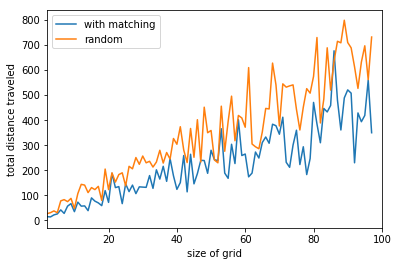

In [15]:

plt.xlim([2,100])
plt.plot(tdist_uber)
plt.plot(tdist_rand)
plt.ylabel('total distance traveled')
plt.xlabel('size of grid')
plt.legend(['with matching', 'random'], loc='upper left')
plt.show()

# 6. Summary 

### Post-Test Algorithm Summary



### Possible Improvements 

If we were to make our simulation more realistic and build upon our model, we would start by taking into account variables such as distance of each trip and time. Time could be implemented here by assuming each unit of weight of an edge can be traveled in one time step. This would allow us to see which drivers are busy and which drivers are available. Also, we could make the number of passengers requesting a ride variable as well. Also, we could take into account the desired time a driver wants to be active for (x number of time steps) and his preference for longer distance drives in order to make more money. We could also add in another variable such as two types of drivers, one set that prefers to stay closer to 'home', or their starting location, and another set that would just prefer the longest distance drives in order to make the most money while working. Lastly, we could attempt to integrate carpools or rideshares into our simulation where a driver can pick up more than one rider at a time, and would prefer to do so if that rider is close to them, and their destination is on their current path. When taking into account ride distance and ride paths, we would have to use further extensions of algorithms such as Djikstra in order to determine whether or not multiple riders would prefer to share a ride. 